In [1]:
#REUSABLE CODE PATH CONFIGURATION
import sys, os
sys.path.append(r"C:\Users\elakkiya\json_tutorial\Chennai_Weather_Prediction")
import utils

# LINEAR REGRESSION

In [2]:
#LOADING LIBRARIES
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [8]:
#LOADING DATA
x_train, y_train, x_test, y_test = utils.load_data()
print(x_train.shape, 
      y_train.shape, x_test.shape, y_test.shape)


#load scaler and transform data
scaler = utils.load_scaler()
x_train_scaled = scaler.fit_transform(x_train.drop(columns=["date"], errors = "ignore"))
x_test_scaled = scaler.transform(x_test.drop(columns = ["date"], errors = "ignore"))

x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.drop(columns=["date"]).columns)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns = x_test.drop(columns=["date"]).columns)
"""
y_train.head()
np.ravel(y_train) can use this to check the difference df to 1D array
"""#flattening y DF - 1D array
print("Before:", y_train.shape)
print("Before:", y_test.shape)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)
print("After:", y_train.shape)
print("After:", y_test.shape)


(3153, 18) (3153, 1) (789, 18) (789, 1)
Before: (3153, 1)
Before: (789, 1)
After: (3153,)
After: (789,)


In [10]:
#linear regression model
linear_reg = LinearRegression()
linear_reg.fit(x_train_scaled_df, y_train)
utils.save_model(linear_reg, "linear_regression") #saved linear regression model

Model saved successfully in C:\Users\elakkiya\json_tutorial\Chennai_Weather_Prediction\models\linear_regression.pkl


Visualizing data


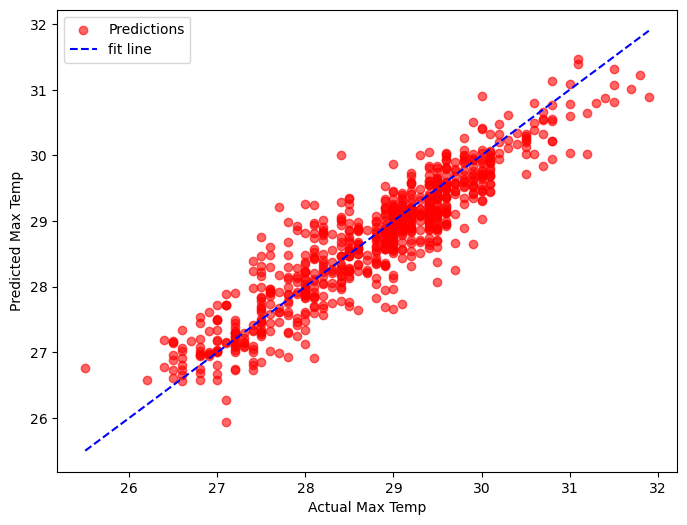

visualization done
RMSE: 0.42390175760541127, 
r2 score:0.837


In [12]:
rmse, r2 = utils.evaluate_model(linear_reg, x_test_scaled_df, y_test, "linear_regression")
print(f"RMSE: {rmse}, \nr2 score:{r2:.3f}")

With RMSE which is 0.42 deg Celsius here. RMSE tells the average prediction in the same units as our target variblae. RMSE measures how much our Linear Regression model predictions deviate from the actually observed values, on average.
We have low RMSE that is 0.42 which means, 
if our actual next day temperature is 32.5degC, our model likely predicted 32.1deg.C to 32.9deg.C.

With R2Score which is 0.837, the linear regression model explained 83.7% of variance using the lag features and other predictors. 
remaining 16.3% variation is due to factors not captured by the model like humidity or sudden weather events or noise if any.

With+-0.4deg.C and explainable 83.7% of variance, Linear Regression is simple yet strong and reliable performer.
Now Lets forecast the next 3 days

## FORECAST

In [13]:
'''
we need a realistic 3-day prediction.
Model Training - Evaluation - Save the model & scaler - prediction
'''
"""
as our model expects the lag features and that depends on previous real or predicted temperature. so recursive 
forecasting is best for linear regression.
Recursive forecasting simulates the real-world behavior by using the predicted values
to estimate the next day.
As LR dont understand "time" directly, this recursive structure lets us to
step in through time manually. 3-5 is simple explainable and realistic/
"""

forecast_results = utils.forecast_next_3_days("linear_regression",x_test_scaled_df, 3)
print(forecast_results)

Last Date:  2025-10-31 23:32:31.379277
Next Day:  2025-11-01 23:32:31.379277
Next Day:  2025-11-02 23:32:31.379277
Next Day:  2025-11-03 23:32:31.379277
         date  predicted_temp
0  2025-11-01           28.81
1  2025-11-02           28.66
2  2025-11-03           28.43
